## Matplotlib

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')

#### 自訂圖例

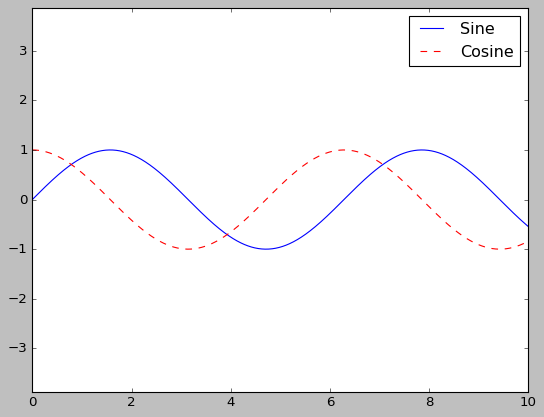

In [8]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend()

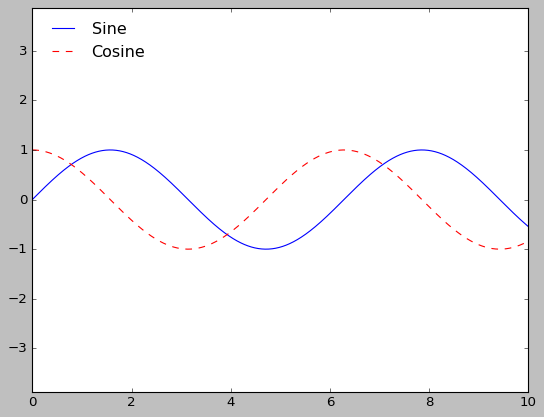

In [9]:
ax.legend(loc='upper left', frameon=False)
fig

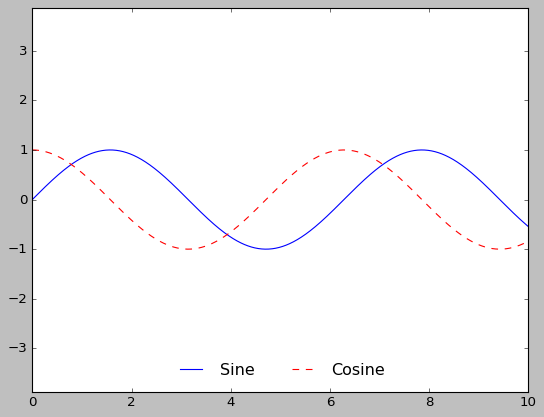

In [10]:
ax.legend(loc='lower center', frameon=False, ncol=2)
fig

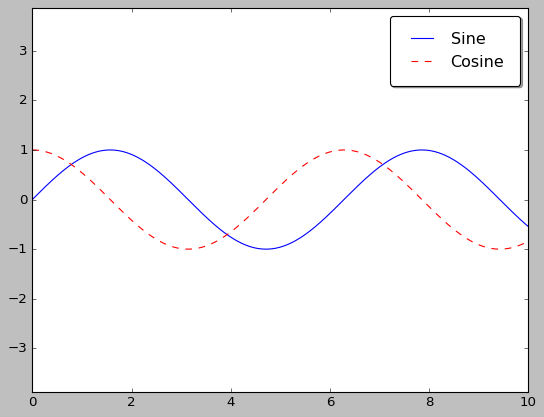

In [11]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

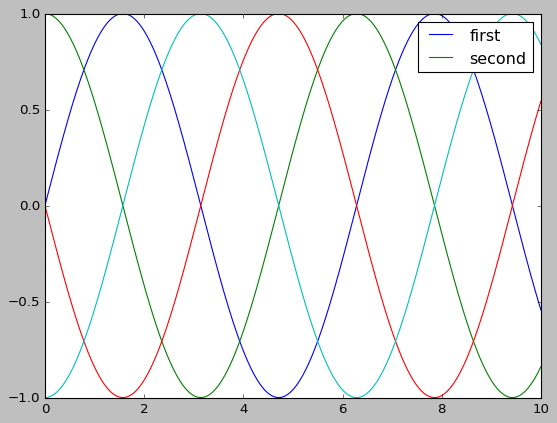

In [12]:
y = np.sin(x[:,np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second'])

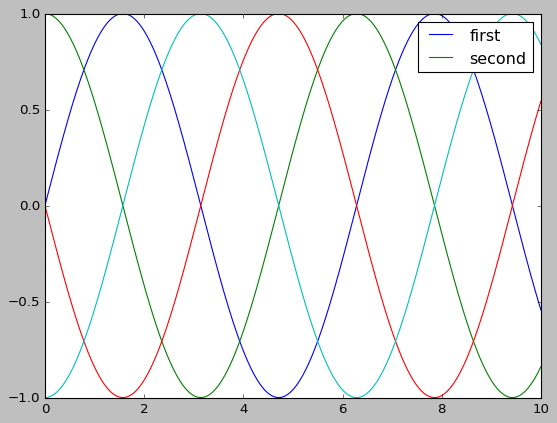

In [13]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True) # 預設會忽略沒有label的元素

In [14]:
import pandas as pd

In [15]:
cities = pd.read_csv('data/california_cities.csv')

In [16]:
cities.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

In [17]:
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

Text(0.5, 1.0, 'California Cities: Area and Population')

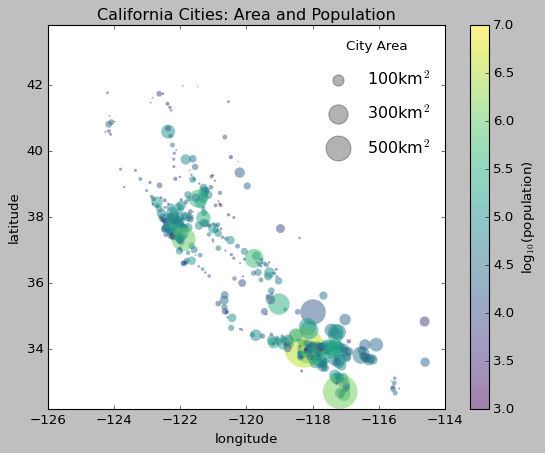

In [18]:
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidths=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area)+'km$^2$') # 要先畫上空串列，才能另外加圖上原本沒有的圖例
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population')

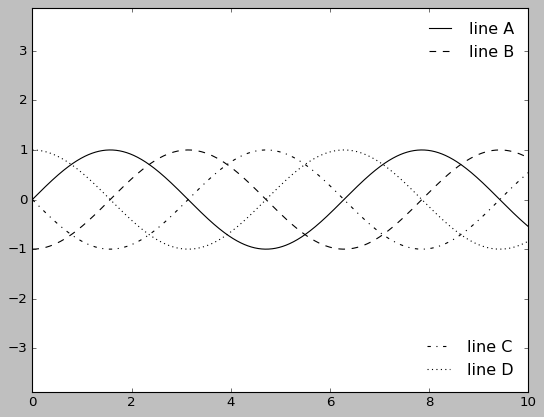

In [19]:
# NOTE: 整個圖表只能建立一個圖例，如果使用plt.legend()或ax.legend()建立多個圖例，新的會覆蓋舊的。
# 可使用ax.add_artist()手動加多組圖例

fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
    ax.axis('equal')

ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg)